In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
#Reading data file and shape
data = pd.read_csv('Multi_linear.txt', header = None)
number_of_samples, number_of_features  = data.shape

#Initializing X and Y according to shape and converting to numpy arrays
X = data.iloc[:,0:number_of_features-1].values
y = data.iloc[:,number_of_features-1:number_of_features].values

#Initializing theta
theta = np.zeros((number_of_features,1))

### 2.2 Gradient Descent

In this part, you will fit the linear regression parameters $\theta$ to our dataset using gradient descent.

#### 2.2.1 Update Equations

The objective of linear regression is to minimize the cost function

$$ J(\theta) = \frac{1}{2m}(X\theta - y)^T(X\theta - y)\qquad\text{(vectorized version)}$$

Recall that the parameters of your model are the $\theta_j$ values. These are
the values you will adjust to minimize cost $J(\theta)$. One way to do this is to
use the batch gradient descent algorithm. In batch gradient descent, each
iteration performs the update

$$ \frac{\partial J(\theta)}{\partial \theta} = \frac{1}{m}X^T(X\theta - y)   $$

With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost J($\theta$).\
In previous notebook we discover linear regression with normal `cost_function` formula but in this section we implement `cost_function` and `gradient_descent` with vectorized version.\
The time complexity of vectorization method is O(s), where s in the number of iterations. As contrast, the for loop approach time complexity is O($s\times n\times m\times n$), where s is the iterations, m is the dataset sample number, n is the dataset feature number. Therefore, using vectorization in our machine leaning algorithm is the key to boost your algorithm and save you a huge amount of training time. Vectorization would be a great approach we need to consider and worth to spent time on.

### 2.2.2 Implementation

We have already set up the data for linear regression. In the following cell, we add another dimension to our data to accommodate the $\theta_0$ intercept term. Do NOT execute this cell more than once.

### 3.1 Feature Normalization

We start by loading and displaying some values from this dataset. By looking at the values, note that house sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.\
Your task here is to complete the code in `feature_normalization` function:
- Subtract the mean value of each feature from the dataset.
- After subtracting the mean, additionally scale (divide) the feature values by their respective “standard deviations.”

The standard deviation is a way of measuring how much variation there is in the range of values of a particular feature (most data points will lie within ±2 standard deviations of the mean); this is an alternative to taking the range of values (max-min). In `numpy`, you can use the `std` function to compute the standard deviation. 

For example, the quantity `X[:, 0]` contains all the values of $x_1$ (house sizes) in the training set, so `np.std(X[:, 0])` computes the standard deviation of the house sizes.
At the time that the function `feature_normalization` is called, the extra column of 1’s corresponding to $x_0 = 1$ has not yet been added to $X$. 

You will do this for all the features and your code should work with datasets of all sizes (any number of features / examples). Note that each column of the matrix $X$ corresponds to one feature.

In [37]:
def feature_normalization(X):
    
    standard_deviation = np.std(X, axis= 0)
    mean = np.mean(X, axis= 0)
    X_normalized = (X - mean)/ standard_deviation
    
    return X_normalized, mean, standard_deviation

In [38]:
normalized_X, mean_X, standard_deviation_X = feature_normalization(X)

In [39]:
#Adding the columns of 1s to X 
X = np.concatenate((np.ones((number_of_samples,1)),normalized_X), axis = 1)

## 2.2.3 Computing the cost $J(\theta)$

As you perform gradient descent to learn minimize the cost function $J(\theta)$, it is helpful to monitor the convergence by computing the cost. In this section, you will implement a function to calculate $J(\theta)$ so you can check the convergence of your gradient descent implementation. 

Your next task is to complete the code for the function `cost_function` which computes $J(\theta)$. As you are doing this, remember that the variables $X$ and $y$ are not scalar values. $X$ is a matrix whose rows represent the examples from the training set and $y$ is a vector whose each elemennt represent the value at a given row of $X$.

In [40]:
def cost_function(X,y,theta):
    #Initialisation of useful values 
    m = np.size(y)
    J = 0
    
    #Hypothesis function in vectorized form
    h = np.dot(X,theta)

    #Cost function in vectorized form
    J = float((1./(2*m)) * np.dot((h - y).T, (h - y)));    
    return J

#### 2.2.4 Gradient descent

Next, you will complete a function which implements gradient descent.\
As you program, make sure you understand what you are trying to optimize and what is being updated. Keep in mind that the cost $J(\theta)$ is parameterized by the vector $\theta$, not $X$ and $y$. That is, we minimize the value of $J(\theta)$ by changing the values of the vector $\theta$, not by changing $X$ or $y$. A good way to verify that gradient descent is working correctly is to look at the value of $J(\theta)$ and check that it is decreasing with each step. 

The starter code for the function `gradient_descent` calls `cost_function` on every iteration and saves the cost to a `python` list. Assuming you have implemented gradient descent and `cost_function` correctly, your value of $J(\theta)$ should never increase, and should converge to a steady value by the end of the algorithm.

In [41]:
def gradient_descent(X,y,theta,alpha = 0.0005,num_iters=1000):
    #Initialisation of useful values 
    m = np.size(y)
    J_history = np.zeros(num_iters)
    J_vec = []  #Used to plot the cost function convergence
    thetahistory = [] #Used for three d plot of convergence

    for i in range(num_iters):
        #Hypothesis function
        h = np.dot(X,theta)
        
        #Calculating the grad function in vectorized form
        theta = theta - alpha * (1/m)* (X.T.dot(h-y))
        J_history[i] = cost_function(X,y,theta)
        
        #Calculate the cost for each iteration(used to plot convergence)
        J_vec.append(cost_function(X,y,theta))
        thetahistory.append(list(theta[:,0]))
    
    return theta,J_history,J_vec, thetahistory

In [42]:
theta_calc , Cost_J, J_vec,thetahistory = gradient_descent(X,y,theta,.02, 500)

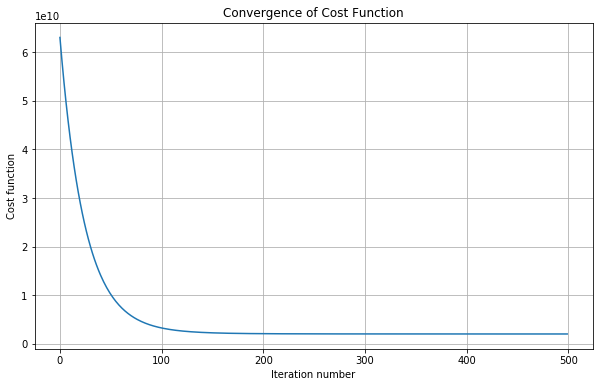

In [43]:
def plot_convergence(jvec):
    plt.figure(figsize=(10,6))
    plt.plot(range(len(jvec)),jvec)
    plt.grid(True)
    plt.title("Convergence of Cost Function")
    plt.xlabel("Iteration number")
    plt.ylabel("Cost function")
    
plot_convergence(J_vec)